In [1]:
import sys
import os.path
import pandas as pd
import json
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


This Notebook provides statistical infos about content.json and the aggregated metadata.
This Notebook is optional, since it doesn't change the output.

In [2]:
fusion = pd.read_json("data/fusedcontent.json", orient = 'table').replace("", np.nan)
data = fusion[(fusion['Identifier'] != '')]
fusion

,filename,license,oer_permalink,title,comment,creator,publisher,source,city,publicationMonth,...,Format,Dateigröße,Error,Textsize,texttitle,Language,Topwords,Header_Topwords,Keywordnames,KeywordIDs
0,SC_Hardware.png,CC BY 4.0 Int.,https://bildungsportal.sachsen.de/opal/oer/6TI...,Hardware zum Styroporschneiden,NaN,Daniela Dobeleit,SLUB Dresden,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,beleg.pdf,CC BY-SA 4.0 Int.,https://bildungsportal.sachsen.de/opal/oer/8I6...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Hochformat,103901.0,NaN,2824.0,¨Ubung 3 Photogrammetrie,GERMAN,['bild' 'entzerrung' 'interpolation' 'nachbar'...,['auswahl' 'beyer' 'bildes' 'entzerrung' 'gena...,"['Auswahl', 'Entzerrung', 'Genauigkeit']","['https://d-nb.info/gnd/4214540-5', 'https://d..."
2,Bereich III.pdf,CC BY-NC-ND 4.0 Int.,https://bildungsportal.sachsen.de/opal/oer/8ZI...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Hochformat,156446.0,NaN,0.0,3 Ebene Tragwerke,NaN,NaN,NaN,NaN,NaN
3,uebung6_A2d.py,CC0 1.0 Universell,https://bildungsportal.sachsen.de/opal/oer/6fn...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ITM_Selbststudium_1.docx,CC BY-NC-SA 4.0 Int.,https://bildungsportal.sachsen.de/opal/oer/7Bm...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11317,statistik_054.mkv,CC BY-NC-ND 4.0 Int.,https://bildungsportal.sachsen.de/opal/oer/6Qd...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11318,statistik_071.mkv,CC BY-NC-ND 4.0 Int.,https://bildungsportal.sachsen.de/opal/oer/6SX...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11319,statistik_058.mkv,CC BY-NC-ND 4.0 Int.,https://bildungsportal.sachsen.de/opal/oer/6G7...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11320,Cast-Filius Installation von Programmen auf de...,CC BY-NC 4.0 Int.,https://bildungsportal.sachsen.de/opal/oer/10l...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Auswertungen über Autoren

In [3]:
#Aus Metadaten gelesen
author_statistics = fusion.groupby(['Author'])["Author"]\
                                       .count() \
                                       .reset_index(name='count') \
                                       .sort_values(['count'], ascending=False, ignore_index=True)
                                       
                                       
#author_statistics.to_csv("data/metaauswertungauthor.csv", index=False)
author_statistics

,Author,count
0,Peter Kiessling,259
1,Jürgen Sachse,86
2,Prof. Dr.-Ing. Henning Zeidler,72
3,Prof. Hacker,60
4,Peter Kießling,59
...,...,...
584,RHeidrich,1
585,Hartmut SImmert,1
586,"Professur für Technik spurgeführter Fahrzeuge,...",1
587,Hausding,1


In [4]:
#Vorgegeben in Ausgangsmetadaten
creator_statistics=fusion.groupby(['creator'])["creator"]\
                                       .count() \
                                       .reset_index(name='count') \
                                       .sort_values(['count'], ascending=False, ignore_index=True)
#creator_statistics.to_csv("data/metaauswertungcreator.csv", index=False)
creator_statistics

,creator,count
0,Frank Babick,51
1,Daniela Dobeleit,11
2,Benno Wessely; Frank Babick,5
3,Max Kobrow,4
4,Stefanie Dreiack,3
...,...,...
73,Lothar Papula,1
74,"Ahnert, Carolin ; Jackenkroll, Martina",1
75,Manoel Kraus,1
76,Marco Hamann,1


In [5]:
#Kombination beider Authorenquellen, priorisierend Opaldaten
fusion['authorfusion'] = fusion['creator']
fusion['authorfusion'].where(fusion['authorfusion'].notna(), fusion['Author'], inplace = True)
creatorfused_statistics = fusion.groupby(['authorfusion'])["authorfusion"]\
                                       .count() \
                                       .reset_index(name='count') \
                                       .sort_values(['count'], ascending=False, ignore_index=True) 
#creatorfused_statistics.to_csv("data/metaauswertungcreatorfused.csv", index=False)
creatorfused_statistics

,authorfusion,count
0,Peter Kiessling,259
1,Jürgen Sachse,86
2,Prof. Dr.-Ing. Henning Zeidler,72
3,Frank Babick,61
4,Prof. Hacker,60
...,...,...
639,Heike Molitor,1
640,"Hildebrandt, Max Peter Werner",1
641,Prof. Bernd Delakowitz,1
642,Pool SEM2,1


### Hier folgen statistische Auswertungen aus dem gewonnenen Daten der ersten Phase

In [6]:
keyword_statistics=data.groupby(['Keywords'])["Keywords"]\
                                       .count() \
                                       .reset_index(name='count') \
                                       .sort_values(['count'], ascending=False, ignore_index=True)

#keyword_statistics.to_csv("data/metaauswertungkeywords.csv", index=False)
keyword_statistics

,Keywords,count
0,"Machine_Learning,Optimization",55
1,"Notizen,Whiteboard,Whiteboard-Seite,Notebook_s...",19
2,"""Bremsen,Bremstechnik,Druckluftbremse,Klotzbre...",10
3,"Garten,Profi,Gartenbau",8
4,"Farbe,Farben,Farbräume,Farbraum,Farbmodelle,Fa...",8
...,...,...
143,"Fahrdynamik,Leistungsbedarf_zur_Überwindung_vo...",1
144,"Fahrdynamik,Leistungsbedarf_zur_Überwindung_de...",1
145,"Fahrdynamik,Leistungsbedarf,fahrdynamische_Aus...",1
146,"Fahrdynamik,Fahrzeitermittlung",1


In [7]:
data["Keywords"].count()

293

In [8]:
error_statistics = data.groupby(['Error'])["Error"]\
                                       .count() \
                                       .reset_index(name='count') \
                                       .sort_values(['count'], ascending=False, ignore_index=True)

error_statistics

,Error,count
0,Missing(404),720
1,PasswordProtected,20
2,OpeningError,7


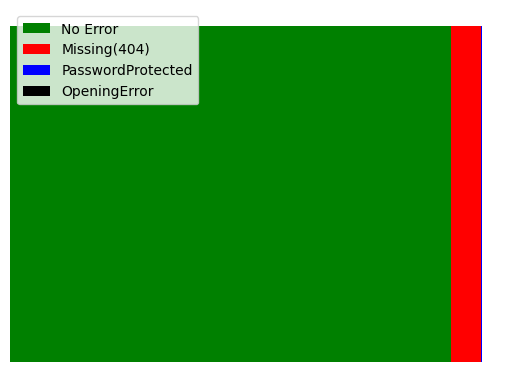

In [9]:
error_list = error_statistics['count'].tolist()
error_list.insert(0, len(data)-error_statistics['count'].sum())

error_name = error_statistics['Error'].tolist()
error_name.insert(0, 'No Error')

colors = ['green', 'red', 'blue', 'black', 'orange', 'violet']

y_offset=0
for error in range(len(error_list)):
    plt.barh(y= 0, 
             width = error_list[error], 
             left = y_offset, 
             color = colors[error],
             label = error_name[error])
    
    y_offset = y_offset + error_list[error]
plt.axis('off')
plt.legend(loc='upper left')

[Text(0, 0, '720'), Text(0, 0, '20'), Text(0, 0, '7')]

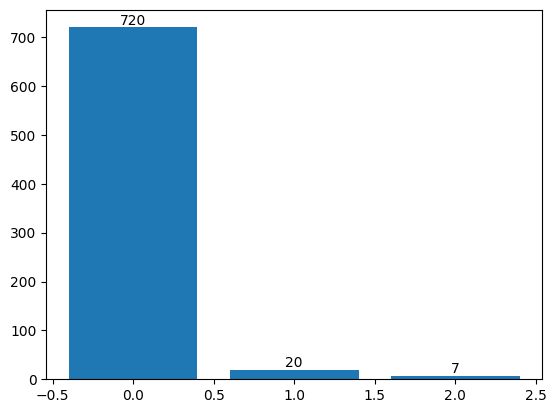

In [10]:
index = np.arange(len(error_statistics))
plt.bar_label(plt.bar(x= index, height=error_statistics['count']), label=error_statistics['Error'])

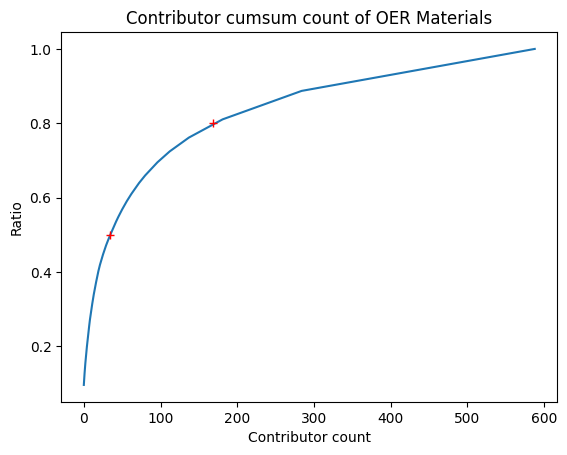

In [11]:
cumsum_statistics = author_statistics.cumsum()
cumsum_statistics["ratio"] = cumsum_statistics["count"] / cumsum_statistics["count"].max()

ax = cumsum_statistics.ratio.plot()
ax.set_title("Contributor cumsum count of OER Materials")
ax.set_xlabel("Contributor count")
ax.set_ylabel("Ratio")

plt.plot([34],[0.5], "+r")
plt.plot([169],[0.8], "+r")

In [12]:

timedata = pd.DataFrame(data['Datum der Erstellung'])
timedata = timedata.dropna()
timelist=list()

for index, row in timedata.iterrows():
    #print(row['Datum der Erstellung'])
    timelist.append(datetime.strptime(row['Datum der Erstellung'],"%Y/%m/%d"))
timedata = timedata.assign(datetime=timelist)
#df1 = df1.assign(e=pd.Series(np.random.randn(sLength)).values)
    #timelist.append(row.strftime(%x))
timedata.drop(columns='Datum der Erstellung', inplace=True)   
    
dailytime_statistics = timedata.groupby(['datetime'])["datetime"]\
                                       .count() \
                                       .reset_index(name='count') \
                                       .sort_values(['datetime'], ascending=False, ignore_index=True)

#time_statistics.to_csv("temp/metaauswertungtime.csv", index=False)
dailytime_statistics

,datetime,count
0,2022-07-27,1
1,2022-06-26,3
2,2022-06-17,1
3,2022-06-13,2
4,2022-05-24,2
...,...,...
1076,2001-07-05,1
1077,1999-10-21,1
1078,1999-02-16,1
1079,1998-07-10,2


<AxesSubplot: xlabel='datetime'>

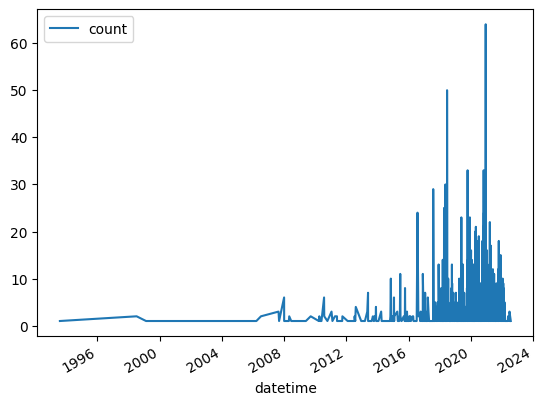

In [13]:
dailytime_statistics.set_index(['datetime'],inplace=True)
dailytime_statistics.plot()

<AxesSubplot: xlabel='datetime'>

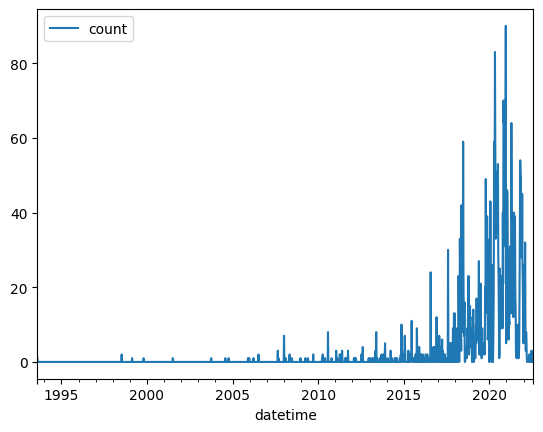

In [14]:
weeklytime_statistics= dailytime_statistics.resample('W').sum() #hier Buchstaben verändern für andere Zeitspannen
weeklytime_statistics.plot()

In [15]:
pagedata = data[('Seitenzahl' )].replace('', np.nan).dropna()
page_statistics = data.groupby(['Seitenzahl'])["Seitenzahl"]\
                                       .count() \
                                       .reset_index(name='count') \
                                       .sort_values(['Seitenzahl'], ascending=True, ignore_index=True)
page_statistics

,Seitenzahl,count
0,1.0,807
1,2.0,447
2,3.0,237
3,4.0,162
4,5.0,161
...,...,...
169,591.0,3
170,623.0,2
171,857.0,2
172,1018.0,1


<AxesSubplot: xlabel='Seitenzahl'>

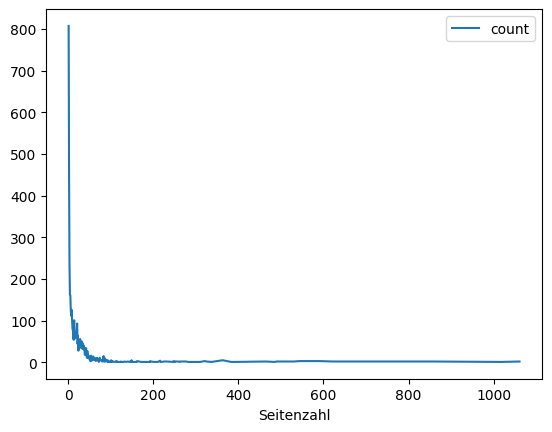

In [16]:
page_statistics.set_index(['Seitenzahl'],inplace=True)
page_statistics.plot()

In [17]:
format_statistics = data.groupby(['Format'])["Format"]\
                                       .count() \
                                       .reset_index(name='count') \
                                       .sort_values(['count'], ascending=False, ignore_index=True)
format_statistics

,Format,count
0,Hochformat,2615
1,Querformat,1880


<AxesSubplot: xlabel='Format'>

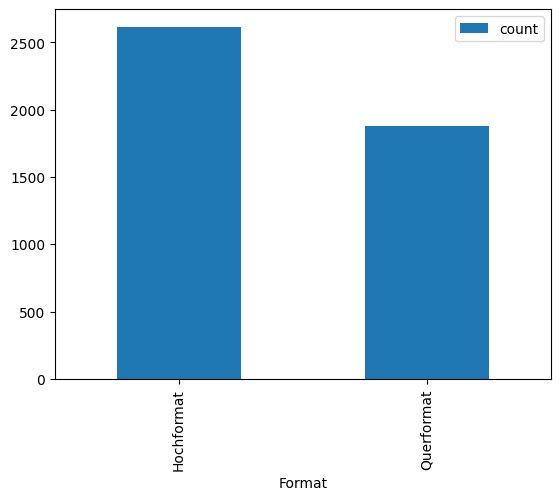

In [18]:
format_statistics.plot(kind='bar', x='Format')

In [19]:
#Dateigröße
sizedata = pd.DataFrame(data['Dateigröße'])
sizedata.dropna(inplace=True)

#sizelist = list()

#for index, row in sizedata.iterrows():
#    sizesplitter = row['Dateigröße'].split(" ", 1)
#    if sizesplitter[1] == "GB":
#        sizelist.append(float(sizesplitter[0]) * 1000000000)
#    elif sizesplitter[1] == "MB":
#        sizelist.append(float(sizesplitter[0]) * 1000000)
#    elif sizesplitter[1] == "kB":
#        sizelist.append(float(sizesplitter[0]) * 1000)
#    else:
#        sizelist.append(float(sizesplitter[0]))

#sizelist
#sizedata = sizedata.assign(size=sizelist)


#df1 = df1.assign(e=pd.Series(np.random.randn(sLength)).values)
    #timelist.append(row.strftime(%x))

size_statistics = sizedata.groupby(['Dateigröße'])["Dateigröße"]\
                                       .count() \
                                       .reset_index(name='count') \
                                       .sort_values(['Dateigröße'], ascending=True, ignore_index=True)
size_statistics

,Dateigröße,count
0,6028.0,1
1,6135.0,1
2,6343.0,1
3,7012.0,1
4,7639.0,1
...,...,...
3680,122738171.0,1
3681,177360802.0,1
3682,198529321.0,1
3683,203312639.0,1


<AxesSubplot: xlabel='Dateigröße'>

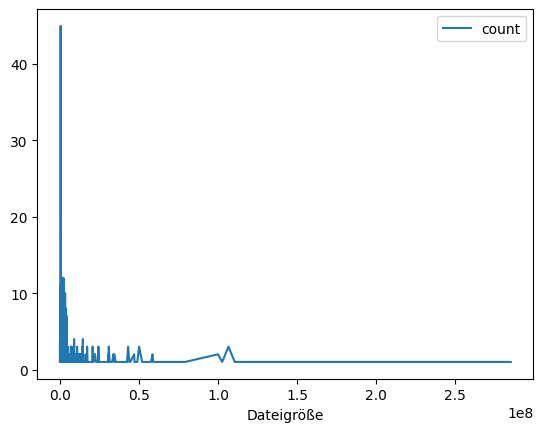

In [20]:
size_statistics.set_index(['Dateigröße'],inplace=True)
size_statistics.plot()

### Hier werden Daten aus content.json und allen Phasen ausgewertet

In [34]:
#delete Errors
fusion = fusion[(fusion['Error'].isnull())]

maxsize = len(fusion)
licenseprev = len(fusion[((fusion['license'].notna()) & (fusion['license'] != ''))])
titleprev = len(fusion[((fusion['title'].notna()) & (fusion['title'] != ''))])
titlenow = len(fusion[((fusion['title'].notna()) & (fusion['title'] != '')) | ((fusion['Titel'].notna()) & (fusion['Titel'] != ''))])
creatorprev = len(fusion[((fusion['creator'].notna()) & (fusion['creator'] != ''))])
creatornow =len(fusion[((fusion['creator'].notna()) & (fusion['creator'] != '')) | ((fusion['Author'].notna()) & (fusion['Author'] != ''))])
pagesprev = len(fusion[((fusion['pages'].notna()) & (fusion['pages'] != ''))])
pagesnow = len(fusion[((fusion['pages'].notna()) & (fusion['pages'] != '')) | ((fusion['Seitenzahl'].notna()) & (fusion['Seitenzahl'] != ''))])
languageprev = len(fusion[((fusion['language'].notna()) & (fusion['language'] != ''))])
languagenow = len(fusion[((fusion['Language'].notna()) & (fusion['Language'] != ''))])
keywordsprev = len(fusion[((fusion['nav1'].notna()) & (fusion['nav1'] != ''))])
keywordsnow = len(fusion[((fusion['Keywords'].notna()) & (fusion['Keywords'] != ''))| ((fusion['KeywordIDs'].notna()) & (fusion['KeywordIDs'] != ''))])
#keywords

columns = ('License', 'Title', 'Creator', 'Pages', 'Language', 'Keywords')
ind =[0.2, 0.65, 1.1, 1.55, 2, 2.45]

<BarContainer object of 6 artists>

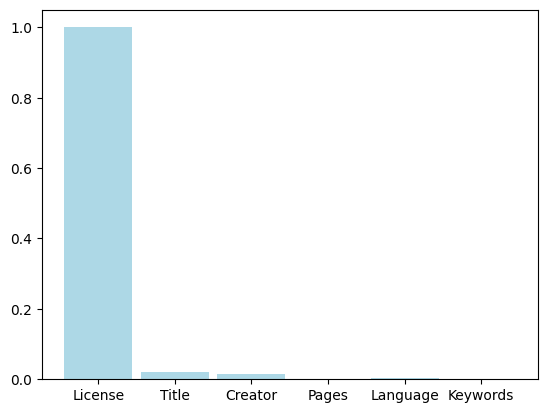

In [35]:
#Graph w/o meta.csv

plt.bar(x = ind, 
        height = [licenseprev/maxsize, titleprev/maxsize, creatorprev/maxsize, pagesprev/maxsize, languageprev/maxsize, keywordsprev/maxsize], 
        color ='lightblue',
        width = 0.4,
        tick_label = columns)

<BarContainer object of 6 artists>

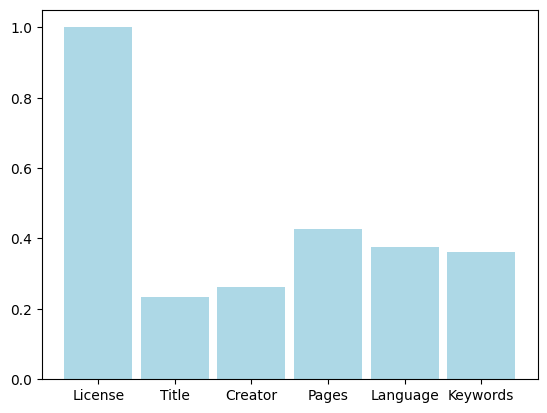

In [36]:
#Graph with meta.csv
plt.bar(x = ind, 
        height = [licenseprev/maxsize, titlenow/maxsize, creatornow/maxsize, pagesnow/maxsize, languagenow/maxsize, keywordsnow/maxsize], 
        color ='lightblue',
        width = 0.4,
        tick_label = columns)

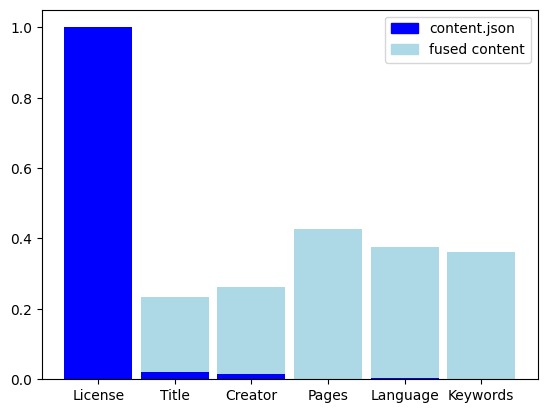

In [37]:
plt.bar(x = ind, 
        height = [licenseprev/maxsize, titlenow/maxsize, creatornow/maxsize, pagesnow/maxsize, languagenow/maxsize, keywordsnow/maxsize], 
        color ='lightblue',
        width = 0.4,
        tick_label = columns)
plt.bar(x = ind, 
        height = [licenseprev/maxsize, titleprev/maxsize, creatorprev/maxsize, pagesprev/maxsize, languageprev/maxsize, keywordsprev/maxsize], 
        color ='blue',
        width = 0.4,
        tick_label = columns)

content_label = mpatches.Patch(color='blue', label='content.json')
fusion_label = mpatches.Patch(color='lightblue', label='fused content')
plt.legend(handles=[content_label, fusion_label])


In [25]:
titlecompare = fusion[((fusion['title'].notna()) & (fusion['Titel'].notna()))]
len(titlecompare)

104

In [26]:
titlesame = titlecompare[(titlecompare['title'] == titlecompare['Titel'])]
len(titlesame)

18

In [27]:
#titlesame.to_csv("data/metaauswertungtitelvergleich.csv", index=False)

In [28]:

textsize = fusion.groupby(['Textsize'])["Textsize"]\
                                       .count() \
                                       .reset_index(name='count') \
                                       .sort_values(['Textsize'], ascending=True, ignore_index=True)
#textsize.set_index(['Textsize'],inplace=True)
#textsize.plot()
olang = fusion.groupby(['Language'])["Language"]\
                                       .count() \
                                       .reset_index(name='count') \
                                       .sort_values(['Language'], ascending=True, ignore_index=True)

In [29]:
#textsize[(textsize['Textsize'] < 100)]
yorubas =fusion[(fusion['Language'] != "GERMAN") & (fusion['Language'] != "ENGLISH")]
cutedge = yorubas.groupby(['Textsize'])["Textsize"]\
                                       .count() \
                                       .reset_index(name='count') \
                                       .sort_values(['Textsize'], ascending=True, ignore_index=True)
cutedge

,Textsize,count
0,0.0,393
1,2.0,5
2,5.0,1
3,8.0,1
4,12.0,2
...,...,...
167,899880.0,1
168,1068320.0,3
169,1226075.0,1
170,1297818.0,2


In [30]:
keywordeval = fusion[['Identifier', 'Keywords', 'Keywordnames']]
keywordeval[(fusion['Identifier'].notna())]

,Identifier,Keywords,Keywordnames
1,8I6sM5zapD60,NaN,"['Auswahl', 'Entzerrung', 'Genauigkeit']"
2,8ZICOHBmAHyQ,NaN,NaN
6,3ztCv-WpxJ4U,NaN,"['Bibliographie der Bibliographien', 'Essay', ..."
8,6mOhjfscZK2A,NaN,['Klassifikationszentrum für medizinische Begr...
11,1eteONeHL82Y,NaN,"['Fuchsmühler Ereignisse', 'Weierstraß-Funktio..."
...,...,...,...
11287,37MxoszUOjDw,NaN,"['Müller', 'Gemeinsame Quellen- und Kanalcodie..."
11288,8nQgLPwKyxec,NaN,"['Handbuch', 'Inhaltsverzeichnis', 'Lehrer']"
11291,8wntomkrcr6g,NaN,"['Handbuch', 'Schüler']"
11293,6kpMNOf2zVq4,NaN,"['App <Programm>', 'Aufgabe', 'Inventor 7', 'U..."


In [31]:
authorfeedback = fusion[['creator', 'Author', 'filename', 'Keywordnames', 'Topwords', 'Header_Topwords']]
authorfeedback[(authorfeedback.Author == "Authorname")]#.to_csv("data/authordata.csv", index=False)